## 简介

不正当在线评论分类本质上可以说是一个文本分类问题，所用的数据集来源于一个kaggle比赛，其测试集是用于提交并检测模型精度，没有分类的标签，所以我只使用训练集进行数据挖掘，作为有监督的机器学习任务。

### 函数库和数据集的导入

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
   

In [2]:
data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')
data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


### 数据分析与可视化

### 样本平衡
把6个分类的标签综合成“unclean”，计算正负样本是否平衡，并统计各个类别样本的比例

In [3]:
rowsum = data.iloc[:,2:].sum(axis = 1)
unclean = (rowsum > 0)
print('total examples: ', len(data))
print('unclean examples: ', unclean.sum())

total examples:  159571
unclean examples:  16225


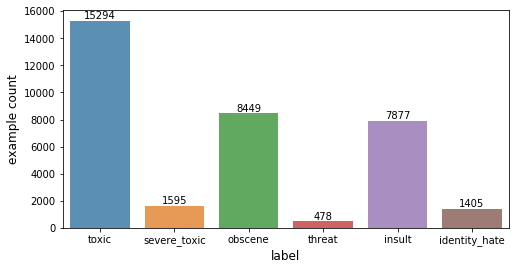

In [4]:
x=data.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.ylabel('example count', fontsize=12)
plt.xlabel('label', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 多标签样本统计
显然数据集中的6个标签不是互斥的，所以肯定会有相当一部分的样本有两个或多个标签

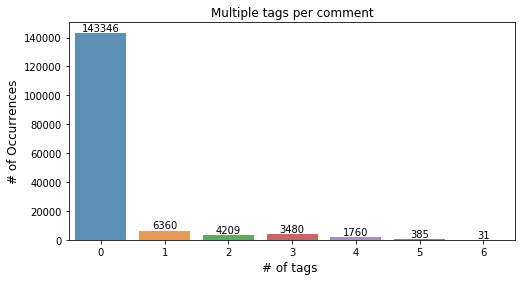

In [5]:
x=rowsum.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 统计出现频率较高的单词

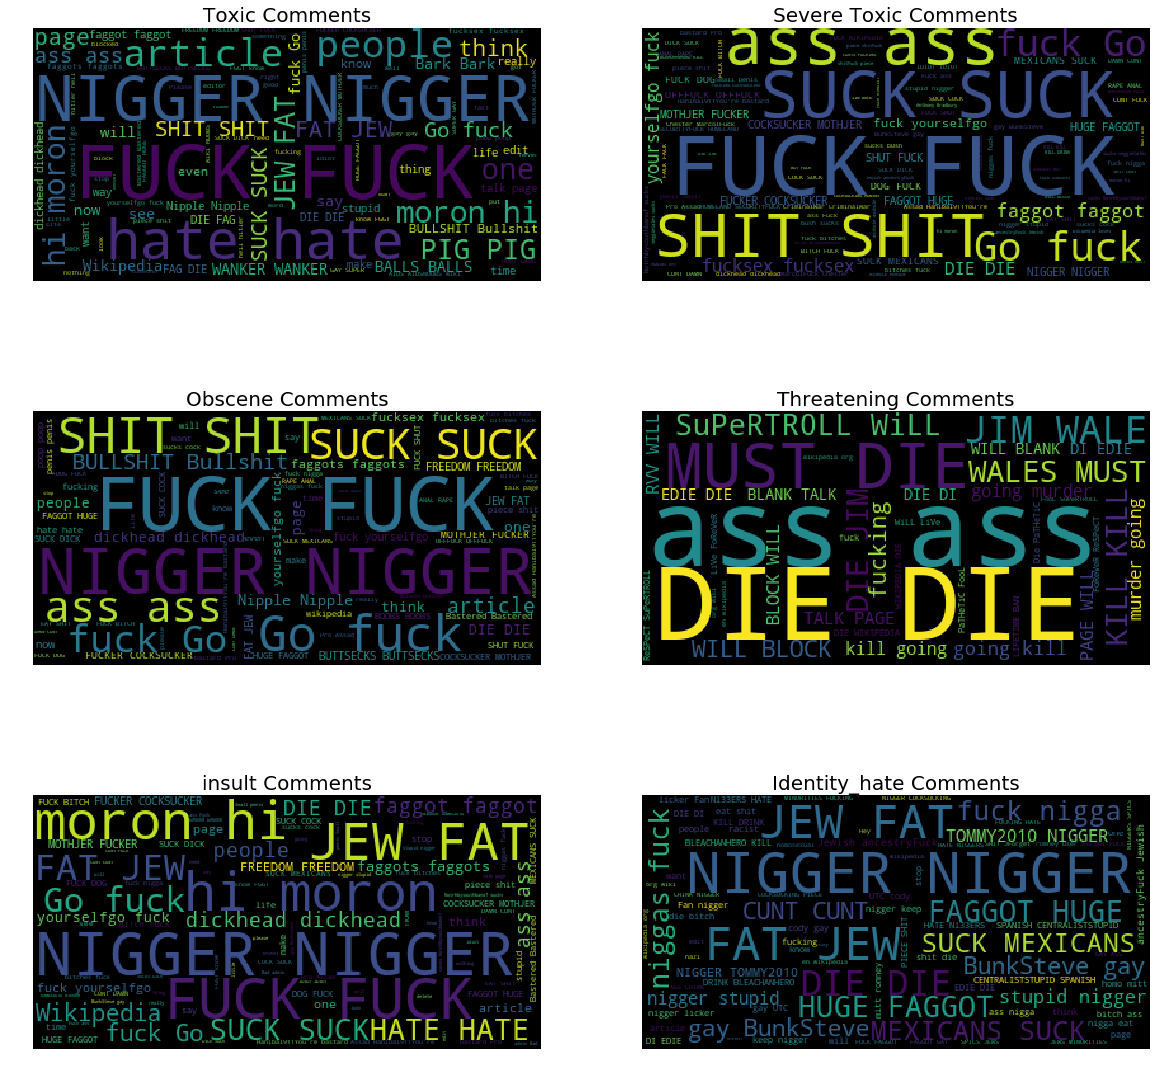

In [6]:

#wordcloud for toxic comments
subset=data[data.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=100)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.axis("off")
plt.title("Toxic Comments", fontsize=20)
plt.imshow(wc)

#Severely toxic comments
plt.subplot(3,2,2)
subset=data[data.severe_toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=100)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Severe Toxic Comments", fontsize=20)
plt.imshow(wc)

#Obscene comments
plt.subplot(3,2,3)
subset=data[data.obscene==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=100)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Obscene Comments", fontsize=20)
plt.imshow(wc)

#Threat comments
plt.subplot(3,2,4)
subset=data[data.threat==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=100)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Threatening Comments", fontsize=20)
plt.imshow(wc)

#insult
plt.subplot(3,2,5)
subset=data[data.insult==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=100)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("insult Comments", fontsize=20)
plt.imshow(wc)

#Identity_hate comments
plt.subplot(3,2,6)
subset=data[data.identity_hate==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=100)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Identity_hate Comments", fontsize=20)
plt.imshow(wc)

plt.show()